In [1]:
import os
import numpy as np
from base import *

In [2]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\test python TA 205'
pthim = os.path.join(pth, '5x')
umpix = 2
pthtest = os.path.join(pth, 'testing images')
pthtestim = os.path.join(pthtest, '5x')
nm = 'CODA_python_09_11_2024_TA_205_python'

WS = [[0, 2, 0, 0, 0, 2, 0], [6, 7], 
      [1, 2, 3, 4, 5, 6, 7], 
      [7, 2, 5, 4, 3, 1, 6], [5]]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[0, 255, 0],
                  [23, 80, 150],
                  [150, 31, 23],
                  [199, 196, 147],
                  [23, 80, 151],
                  [255, 255, 255],
                  [242, 167, 227]])

classNames = ['bronchioles', 'alveoli', 'vasculature', 'mets', 'nonexpanded','whitespace','collagen']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Creating Net metadata file...


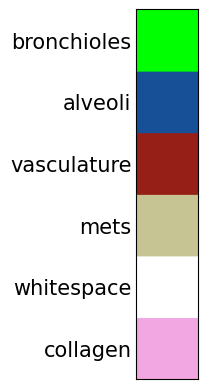

In [7]:
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [8]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
 
 Making down-sampled images...
All down-sampled images already exist in the directory.
Image 1 of 4: 2024-02-26 10.36.39
 annotation data previously loaded
Image 2 of 4: 84 - 2024-02-26 10.33.40
 annotation data previously loaded
Image 3 of 4: TVNTC 1-2 2
 annotation data previously loaded
Image 4 of 4: TVWT 4-1 1
 annotation data previously loaded


In [9]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 29303100.0 pixels of bronchioles, 8% of the most common class.
 There are 125561600.0 pixels of alveoli, 37% of the most common class.
 There are 20736100.0 pixels of vasculature, 6% of the most common class.
 There are 33200800.0 pixels of mets, 9% of the most common class.
 There are 335117300.0 pixels of whitespace. This is the most common class.
 There are 21986600.0 pixels of collagen, 6% of the most common class.

Building training tiles...
Total time elapsed for the while loop: 582.9373109340668
Saving big tiles
  1 of 15 training images completed in 10 minutes
  Used 1468.8% counts and 100.0% unique annotations of bronchioles
  Used 1025.0% counts and 100.0% unique annotations of alveoli
  Used 2055.7% counts and 100.0% unique annotations of vasculature
  Used 1582.1% counts and 100.0% unique annotations of mets
  Used 1376.5% counts and 100.0% unique annotations of whitespace
  Used 2026.0% counts and 10

KeyboardInterrupt: 

In [ ]:
train_segmentation_model(pthDL, fine_tune=False)

Testing segmentation model......
 
Importing annotation data...
 
 Making downsampled images...
Image 1 of 1: TVWT 2-2 2
 annotation data previously loaded
   
  Starting classification of image 1 of 1: TVWT 2-2 2.tif
  Image TVWT 2-2 2.tif already classified by this model
  Total time for classification: 0.0h 0.0m 19.537779331207275s

Calculating total number of pixels in the testing dataset...
  There are 45046 pixels of bronchioles, 23% of the most common class.
  There are 115507 pixels of alveoli, 60% of the most common class.
  There are 34798 pixels of vasculature, 18% of the most common class.
  There are 127195 pixels of mets, 66% of the most common class.
  There are 191199 pixels of whitespace. This is the most common class.
  There are 18246 pixels of collagen, 9% of the most common class.


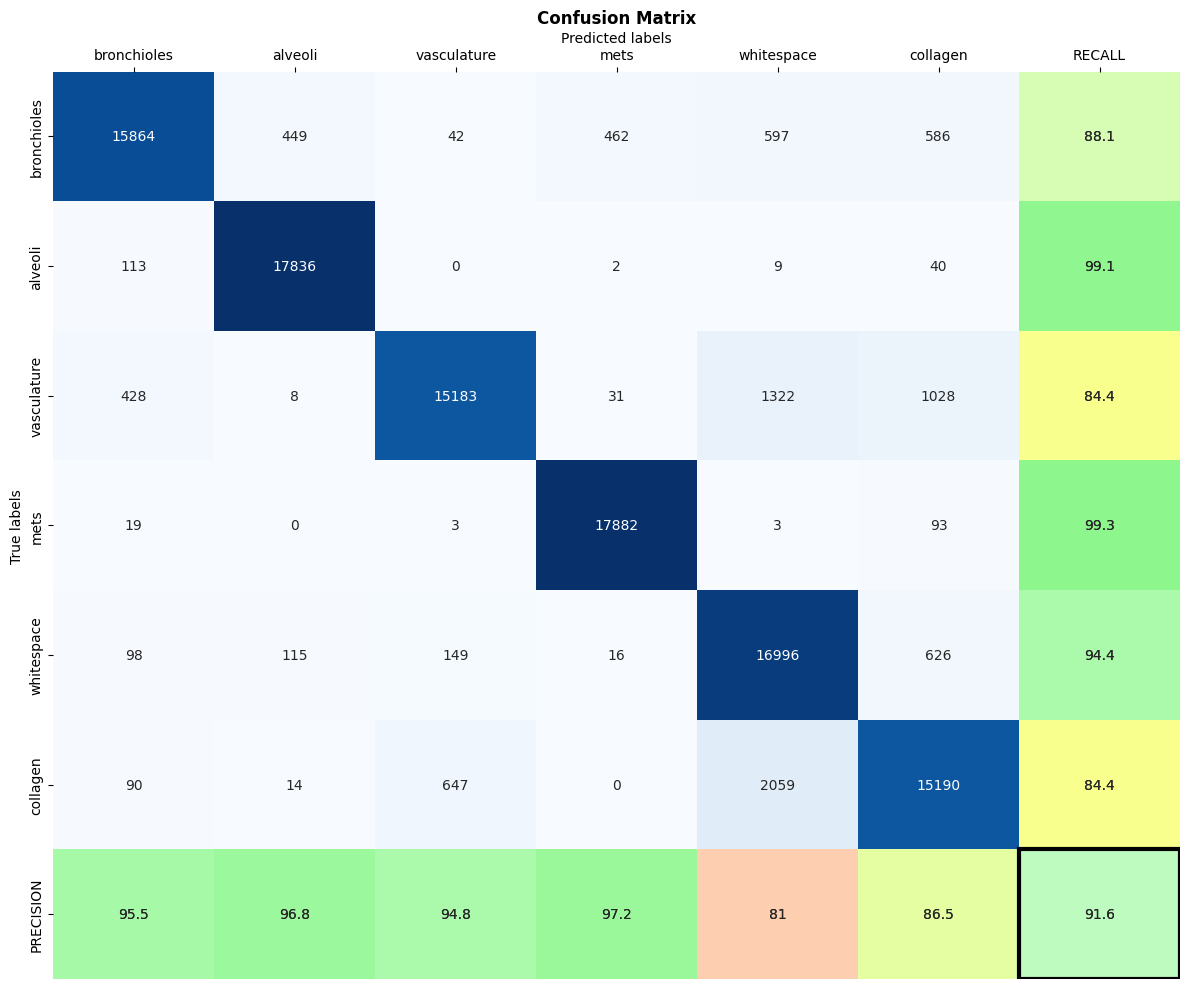


Confusion matrix saved to \\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\test python TA 205\CODA_python_09_11_2024_TA_205_python\confusion_matrix.jpg

Overall Accuracy: 91.6%


In [3]:
test_segmentation_model(pthDL,pthtest, pthtestim)

In [ ]:
classify_images(pthim,pthDL)

In [ ]:
quantify_images(pthDL, pthim)